In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt
import numpy as np
import talib as ta
import math as m
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import Imputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from pylab import rcParams



### Data de bloomberg

In [2]:
data = pd.read_csv('Desktop/data_tfm_ind.csv', index_col = 0)

In [3]:
data.tail()

,volume,close,ticker,mo20_mo250,rent_250,rent_750,vo_250,dis_to_max_250,dis_to_max_750,dis_to_min_250,...,MACDsign,MACDdiff,TSI,FORCE,COPP,t1_return,vo_20,vo_10,vo_50,t0_return
23/02/2018 0:00,1.644987e+09,2472.00,PSN LN Equity_TRADE,-0.009742,0.194674,0.541389,0.209116,0.169094,0.169094,0.192475,...,212.852878,16.990357,0.220038,-9.136480e+12,0.669252,0.0,388.040218,164.190810,431.042689,-0.049962
23/02/2018 0:00,4.470414e+09,700.00,PSON LN Equity_TRADE,0.021520,0.062411,-0.565990,0.252264,0.071429,1.154286,0.235658,...,-90.054386,19.499639,-0.176357,5.961800e+11,-0.600811,0.0,93.527207,47.233544,252.464012,0.021301
23/02/2018 0:00,5.306532e+06,89.45,PSPN SE Equity_TRADE,-0.010471,-0.036981,0.017856,0.129401,0.053102,0.103410,0.040721,...,0.620082,-0.151971,0.031076,4.972069e+07,0.095468,0.0,2.892889,1.711692,4.877113,-0.028246
23/02/2018 0:00,2.272301e+07,17.60,ELE SQ Equity_TRADE,-0.134685,-0.112693,0.037623,0.196667,0.293182,0.293182,0.060241,...,0.054363,-0.265030,-0.029696,-4.599552e+07,0.057571,0.0,1.310307,1.481523,3.930985,-0.054526
23/02/2018 0:00,1.236084e+07,138.85,WCH GY Equity_TRADE,0.233416,0.282559,0.340530,0.242567,0.253151,0.253151,0.520145,...,10.666028,5.895874,0.314498,-4.095972e+08,0.855472,0.0,26.496063,26.682971,21.407430,-0.175475


### Generación de mas indicadores

In [4]:


# data['MOM']=None #va
# for t in  pd.unique(data.ticker):
#     sel_ticker = data.ticker == t
#     data.loc[sel_ticker,'MOM'] = data.loc[sel_ticker,'close'].diff(14)


# data['EMA_30']=None #va
# for t in  pd.unique(data.ticker):
#     sel_ticker = data.ticker == t
#     n = 30
#     data.loc[sel_ticker,'EMA_30'] = pd.ewma(data.loc[sel_ticker,'close'], span = 30, min_periods = n - 1)  
    

# data['EMA_50']=None
# for t in  pd.unique(data.ticker):
#     sel_ticker = data.ticker == t
#     n=50
#     data.loc[sel_ticker,'EMA_50'] = pd.ewma(data.loc[sel_ticker,'close'], span = 50, min_periods = n - 1) 
    

# data['ROC']=None#va
# for t in  pd.unique(data.ticker):
#     sel_ticker = data.ticker == t
#     M = data.loc[sel_ticker,'close'].diff(30-1)
#     N = data.loc[sel_ticker,'close'].shift(30-1) 
#     data.loc[sel_ticker,'ROC'] = (M / N)

# data['MACD']= None
# for t in  pd.unique(data.ticker):
#     sel_ticker = data.ticker == t
#     n_fast = 12
#     n_slow= 26
#     EMAfast = pd.ewma(data.loc[sel_ticker,'close'], span = n_fast, min_periods = n_slow - 1)
#     EMAslow = pd.ewma(data.loc[sel_ticker,'close'], span = n_slow, min_periods = n_slow - 1)
#     data.loc[sel_ticker,'MACD'] = EMAfast - EMAslow 
    

# data['MACDsign']= None
# for t in  pd.unique(data.ticker):
#     sel_ticker = data.ticker == t    
#     data.loc[sel_ticker,'MACDsign'] = pd.ewma(data.loc[sel_ticker,'MACD'], span = 9, min_periods = 8)

    
# data['MACDdiff']= None  
# for t in  pd.unique(data.ticker):
#     sel_ticker = data.ticker == t
#     data.loc[sel_ticker,'MACDdiff']= data.loc[sel_ticker,'MACD'] - data.loc[sel_ticker,'MACDsign']
    
            
# data['KST']=None#va
# for t in  pd.unique(data.ticker):
#     sel_ticker = data.ticker == t 
#     r1 = 10
#     M = data.loc[sel_ticker,'close'].diff(r1 - 1)  
#     N = data.loc[sel_ticker,'close'].shift(r1 - 1)  
#     ROC1 = M / N 
#     r2 = 10
#     M = data.loc[sel_ticker,'close'].diff(r2 - 1)  
#     N = data.loc[sel_ticker,'close'].shift(r2 - 1)  
#     ROC2 = M / N  
#     r3 = 20
#     M = data.loc[sel_ticker,'close'].diff(r3 - 1)  
#     N = data.loc[sel_ticker,'close'].shift(r3 - 1)  
#     ROC3 = M / N  
#     r4 = 15
#     M = data.loc[sel_ticker,'close'].diff(r4 - 1)  
#     N = data.loc[sel_ticker,'close'].shift(r4 - 1)  
#     ROC4 = M / N 
#     n1,n2,n3,n4 = 10,15,20,30
#     data.loc[sel_ticker,'KST'] = pd.rolling_sum(ROC1, n1) + pd.rolling_sum(ROC2, n2) * 2 + pd.rolling_sum(ROC3, n3) * 3 + pd.rolling_sum(ROC4, n4) * 4  

    
# data['TSI']=None#va
# for t in  pd.unique(data.ticker):
#     sel_ticker = data.ticker == t   
#     M = data.loc[sel_ticker,'close'].diff(1)
#     aM = abs(M)  
#     r = 25
#     s = 13
#     EMA1 = pd.ewma(M, span = r, min_periods = r - 1)  
#     aEMA1 = pd.ewma(aM, span = r, min_periods = r - 1)  
#     EMA2 = pd.ewma(EMA1, span = s, min_periods = s - 1)
#     aEMA2 = pd.ewma(aEMA1, span = s, min_periods = s - 1) 
#     data.loc[sel_ticker,'TSI'] = EMA2 / aEMA2
            
    
# data['FORCE']=None #va
# for t in  pd.unique(data.ticker):
#     sel_ticker = data.ticker == t
#     n=20
#     data.loc[sel_ticker,'FORCE']= data.loc[sel_ticker,'close'].diff(n) * data.loc[sel_ticker,'volume'].diff(n)

    
# data['COPP']=None#va
# for t in  pd.unique(data.ticker):
#     sel_ticker = data.ticker == t  
#     M = data.loc[sel_ticker,'close'].diff(int(n * 11 / 10) - 1)  
#     N = data.loc[sel_ticker,'close'].shift(int(n * 11 / 10) - 1)  
#     ROC1 = M / N  
#     M = data.loc[sel_ticker,'close'].diff(int(n * 14 / 10) - 1)  
#     N =data.loc[sel_ticker,'close'].shift(int(n * 14 / 10) - 1)  
#     ROC2 = M / N  
#     data.loc[sel_ticker,'COPP'] = pd.ewma(ROC1 + ROC2, span = n, min_periods = n)
   
  


In [5]:
# Data_indicadores = data.to_csv('Desktop/data_tfm.csv')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209493 entries, 25/02/1999 0:00 to 23/02/2018 0:00
Data columns (total 25 columns):
volume            204395 non-null float64
close             204517 non-null float64
ticker            209493 non-null object
mo20_mo250        198590 non-null float64
rent_250          198566 non-null float64
rent_750          185027 non-null float64
vo_250            198566 non-null float64
dis_to_max_250    198590 non-null float64
dis_to_max_750    185051 non-null float64
dis_to_min_250    198590 non-null float64
dis_to_min_750    185051 non-null float64
MOM               187009 non-null float64
EMA_30            169714 non-null float64
ROC               168491 non-null float64
MACD              174627 non-null float64
MACDsign          166059 non-null float64
MACDdiff          166059 non-null float64
TSI               161208 non-null float64
FORCE             179238 non-null float64
COPP              148050 non-null float64
t1_return         209493 non-nul

In [7]:
data

,volume,close,ticker,mo20_mo250,rent_250,rent_750,vo_250,dis_to_max_250,dis_to_max_750,dis_to_min_250,...,MACDsign,MACDdiff,TSI,FORCE,COPP,t1_return,vo_20,vo_10,vo_50,t0_return
25/02/1999 0:00,1.757053e+09,3.2240,0876218D LN Equity_TRADE,0.000204,0.091721,0.275254,0.375295,0.149504,0.149504,0.443798,...,NaN,NaN,NaN,NaN,NaN,-8.002481,NaN,NaN,NaN,NaN
25/02/1999 0:00,1.823139e+08,80.3314,SECUB SS Equity_TRADE,0.257757,0.871680,1.620618,0.468893,0.047619,0.047619,1.175299,...,NaN,NaN,NaN,NaN,NaN,-9.523798,NaN,NaN,NaN,NaN
25/02/1999 0:00,7.805671e+06,50.7000,BB FP Equity_TRADE,-0.079195,-0.159218,0.374924,0.475404,0.533511,0.599663,0.192007,...,NaN,NaN,NaN,NaN,NaN,-5.029586,NaN,NaN,NaN,NaN
25/02/1999 0:00,6.696000e+06,599.3650,SEO VX Equity_TRADE,0.121932,0.151365,1.084239,0.360063,0.039584,0.208334,0.383285,...,NaN,NaN,NaN,NaN,NaN,-8.333319,NaN,NaN,NaN,NaN
25/02/1999 0:00,4.954323e+09,420.0000,BA_ LN Equity_TRADE,-0.061251,-0.004815,0.831264,0.494938,0.297619,0.297619,0.346154,...,NaN,NaN,NaN,NaN,NaN,-2.440476,NaN,NaN,NaN,NaN
25/02/1999 0:00,2.695000e+05,44.0000,SFG DC Equity_TRADE,-0.116055,-0.016856,-0.669348,0.646153,0.886364,3.090909,0.466667,...,NaN,NaN,NaN,NaN,NaN,-9.090909,NaN,NaN,NaN,NaN
25/02/1999 0:00,9.388520e+08,271.7500,SFW LN Equity_TRADE,-0.144079,-0.217780,-0.020009,0.339752,0.457222,0.569457,0.043186,...,NaN,NaN,NaN,NaN,NaN,-9.015639,NaN,NaN,NaN,NaN
25/02/1999 0:00,1.370963e+09,453.5420,SGC LN Equity_TRADE,0.034812,0.465244,1.234457,0.459626,0.254018,0.254018,0.417133,...,NaN,NaN,NaN,NaN,NaN,-0.321690,NaN,NaN,NaN,NaN
25/02/1999 0:00,4.864587e+07,29.6940,BAYN GY Equity_TRADE,-0.163938,-0.174055,0.438581,0.329683,0.554860,0.554860,0.068975,...,NaN,NaN,NaN,NaN,NaN,8.516872,NaN,NaN,NaN,NaN
25/02/1999 0:00,1.684503e+08,214.3340,SGE LN Equity_TRADE,0.378934,0.530352,1.964403,0.500403,0.050309,0.050309,1.032411,...,NaN,NaN,NaN,NaN,NaN,10.306811,NaN,NaN,NaN,NaN


In [8]:
data.describe().transpose().round(1)

,count,mean,std,min,25%,50%,75%,max
volume,204395.0,7.541418e+08,3.586029e+09,2.000000e-01,4967825.4,29094150.2,233826944.5,2.463640e+11
close,204517.0,3.560000e+02,1.986600e+03,0.000000e+00,16.4,54.3,245.0,7.385000e+04
mo20_mo250,198590.0,0.000000e+00,2.000000e-01,-1.000000e+00,-0.1,0.0,0.1,4.300000e+00
rent_250,198566.0,1.000000e-01,4.000000e-01,-4.100000e+00,-0.1,0.1,0.3,5.700000e+00
rent_750,185027.0,3.000000e-01,9.000000e-01,-5.700000e+00,-0.0,0.3,0.7,1.045000e+02
vo_250,198566.0,3.000000e-01,2.000000e-01,0.000000e+00,0.2,0.3,0.4,5.600000e+00
dis_to_max_250,198590.0,8.000000e-01,2.970000e+01,0.000000e+00,0.0,0.1,0.3,3.110700e+03
dis_to_max_750,185051.0,3.000000e+00,6.530000e+01,0.000000e+00,0.1,0.3,0.7,3.818400e+03
dis_to_min_250,198590.0,4.000000e-01,6.000000e-01,0.000000e+00,0.1,0.3,0.5,2.330000e+01
dis_to_min_750,185051.0,1.100000e+00,1.800000e+00,0.000000e+00,0.3,0.7,1.3,1.164000e+02


### Funcion para rankear 

In [9]:
def Rank(array, menorMayor=True):
    """
    calcula el ranking para un array
    menorMayor :si True menor tiene el ranking 1
    """
    temp = array.argsort()
    ranks = np.empty(len(array), int)
    ranks[temp] = np.arange(1, len(array) + 1)
    if menorMayor == False:
        array = -1 * ranks
        temp = array.argsort()
        ranks = np.empty(len(array), int)
        ranks[temp] = np.arange(1, len(array) + 1)
    return ranks

In [10]:
n_total = len(data)
feature_to_eliminate = ['close','ticker']
data_sel = data.drop(feature_to_eliminate,axis=1).dropna()
data_sel.index = pd.to_datetime(data_sel.index )

In [11]:
print('dimensión : '+str(len(data_sel)))
print('% seleccionado sin None: '+ str(len(data_sel)/n_total))

dimensión : 144527
% seleccionado sin None: 0.6898893996458115


In [12]:

# imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
data_total = data_sel.copy()

_t1_return = data_sel['t1_return'].copy() # objetivo
# Variable objetivo
y = data_total.pop('t1_return')

# Buscamos que se comporten mejor que la media
X = data_total


fecha_corte = dt.datetime(2007,1,1)
#Entrenamiento y test
X_train = X[X.index <= fecha_corte]
X_test= X[X.index > fecha_corte]
y_train = y[y.index <= fecha_corte].values
y_test = y[y.index > fecha_corte].values
t1_return =_t1_return[_t1_return.index > fecha_corte].values

print('len X_train '+str(len(X_train)))
print('len X_test '+str(len(X_test)))

len X_train 38249
len X_test 106278


In [13]:
from sklearn.preprocessing import StandardScaler

def normalizacion_percentil(dtime,valores):
    percentil = []
    for _dttime in dtime.unique():
        sel_rank = valores[dtime == _dttime]
        ranking = Rank(sel_rank, menorMayor=True)
        percentil.extend( ranking / max(ranking))
    return np.array(percentil)




### Normalizacion de la data 

In [14]:
## Normalizamos los datos por standar_scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train),columns= X_train.columns,
                           index = X_train.index)
X_test_std = pd.DataFrame(scaler.fit_transform(X_test),columns= X_test.columns,
                           index = X_test.index)
### La variable objetivo la normalizamos por percentiles, y le damos valor 1
# a los que tienen mejor percentil

y_train_std = normalizacion_percentil(X_train.index,y_train)
y_test_std = normalizacion_percentil(X_test.index,y_test)
#y_train_percentil= normalizacion_percentil(X_train.index,y_train)
#y_test_percentil = normalizacion_percentil(X_test.index,y_test)


### el valor de la variable objetivo es 1 cuando la accion se ha comportado mejor que el 50% y 0 
# si se ha comportado peor
y_test_std[y_test_std < 0.5] = 0
y_test_std[y_test_std >= 0.5] = 1
y_train_std[y_train_std < 0.5] = 0
y_train_std[y_train_std >= 0.5] = 1

In [53]:
normalizacion_percentil(X_train.index,y_train)

array([0.18985696, 0.83224967, 0.92197659, ..., 0.46478873, 0.77112676,
       0.44248826])

In [15]:
# from sklearn.ensemble import RandomForestClassifier

# #Modelo
# forest = RandomForestClassifier(n_estimators=10000, random_state=0,n_jobs=-1)
# #apply model
# forest.fit(X_train_std,y_train_std)

features = np.array([c for c in X_train.columns])
# importances = forest.feature_importances_
# indices = np.argsort(importances)[::-1]
# plt.title('Feature Importances')
# plt.bar(range(X_train.shape[1]), 
#          importances[indices],
#          color='lightblue', 
#          align='center')

# plt.xticks(range(X_train.shape[1]), 
#             features[indices], rotation=90)
# plt.xlim([-1, X_train.shape[1]])
# plt.tight_layout()
# plt.savefig('Desktop/Random.png', dpi=300)
# plt.show()

In [16]:
## Seleccinamos las 20 primeras
features_sel = features[:]
features_sel

array(['volume', 'mo20_mo250', 'rent_250', 'rent_750', 'vo_250',
       'dis_to_max_250', 'dis_to_max_750', 'dis_to_min_250',
       'dis_to_min_750', 'MOM', 'EMA_30', 'ROC', 'MACD', 'MACDsign',
       'MACDdiff', 'TSI', 'FORCE', 'COPP', 'vo_20', 'vo_10', 'vo_50',
       't0_return'], dtype='<U14')

### reducimos dimensiones:PCA

In [17]:
from sklearn.decomposition import PCA


In [18]:

## reducimos por features_sel
X_train_std = X_train_std[features_sel]
X_test_std = X_test_std[features_sel]

# if with_pca: # aplicamos reduccion de componentes
pca = PCA(n_components = len(features[:]))
_train = pca.fit_transform(X_train_std)
_test = pca.fit_transform(X_test_std)
X_train_pda = pd.DataFrame(_train,index=X_train_std.index)
X_test_pda = pd.DataFrame(_test,index=X_test_std.index)

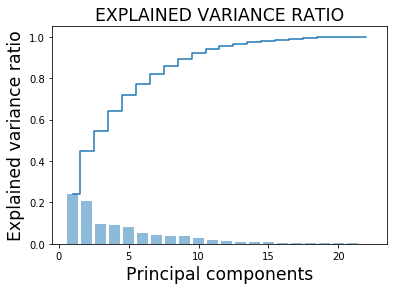

In [19]:
length = len(pca.explained_variance_ratio_) + 1
plt.bar(range(1, length), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, length), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio',fontsize = 'xx-large')
plt.xlabel('Principal components',fontsize = 'xx-large')
plt.title('EXPLAINED VARIANCE RATIO',fontsize = 'xx-large')

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
label_size = 15
rcParams['xtick.labelsize'] = label_size
rcParams['ytick.labelsize'] = label_size
plt.show()
plt.show()

#### una vez que tengamos claro cuantos componentes reduccion

In [21]:
features_sel = features[:18]
features_sel

# ## reducimos por features_sel
# X_train_std = X_train_std[features_sel]
# X_test_std = X_test_std[features_sel]

# # if with_pca: # aplicamos reduccion de componentes
# pca = PCA(n_components = len(features[:]))
# _train = pca.fit_transform(X_train_std)
# _test = pca.fit_transform(X_test_std)
# X_train_pda = pd.DataFrame(_train,index=X_train_std.index)
# X_test_pda = pd.DataFrame(_test,index=X_test_std.index)


array(['volume', 'mo20_mo250', 'rent_250', 'rent_750', 'vo_250',
       'dis_to_max_250', 'dis_to_max_750', 'dis_to_min_250',
       'dis_to_min_750', 'MOM', 'EMA_30', 'ROC', 'MACD', 'MACDsign',
       'MACDdiff', 'TSI', 'FORCE', 'COPP'], dtype='<U14')

In [24]:
## reducimos por features_sel
X_train_std = X_train_std[features_sel]
X_test_std = X_test_std[features_sel]

# if with_pca: # aplicamos reduccion de componentes
pca = PCA(n_components = len(features[:18]))
_train = pca.fit_transform(X_train_std)
_test = pca.fit_transform(X_test_std)
X_train_pda = pd.DataFrame(_train,index=X_train_std.index)
X_test_pda = pd.DataFrame(_test,index=X_test_std.index)

### Grid search mejores hipermarametros

In [25]:
from sklearn import svm, grid_search
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_
svc_param_selection(X_train_pda, y_train_std,3)

C:\Users\abmac\AppData\Roaming\Python\Python36\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\abmac\AppData\Roaming\Python\Python36\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'C': 1, 'gamma': 0.1}

In [28]:
clf_spv_GS = SVC(kernel='linear', random_state= 5,C= 1, gamma = 0.1)
clf_spv_GS.fit(X_train_pda, y_train_std)
predictions_SVM_GS = clf_spv_GS.predict(X_test_pda)

retornos anualizadosreturns    3.558352
dtype: float64
volatilidad anualizadareturns    12.186968
dtype: float64


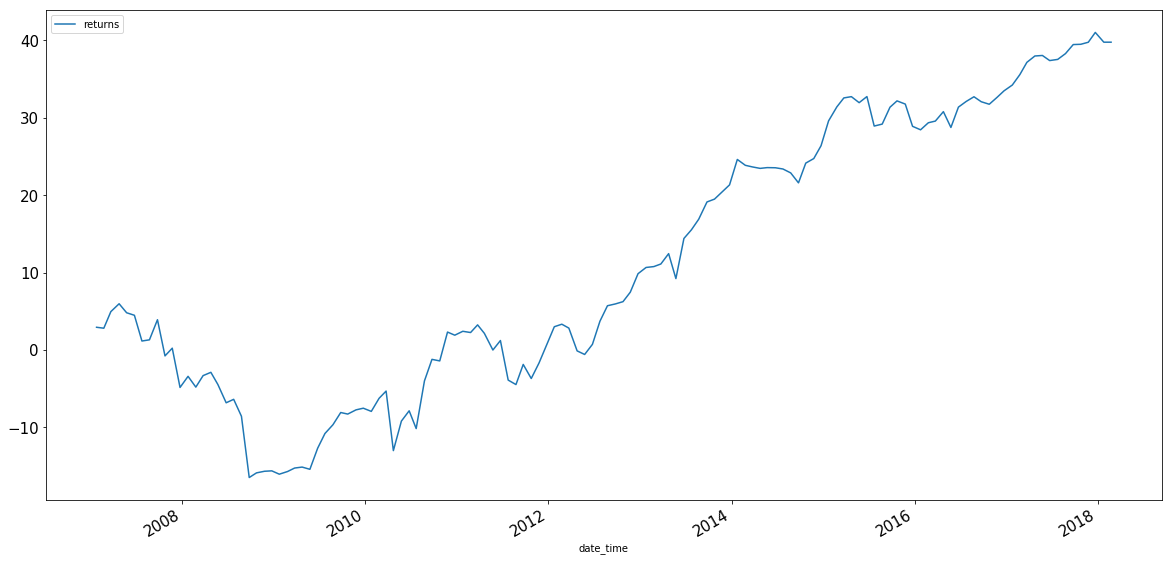

In [30]:
frame = X_test.copy()
frame['date_time'] = frame.index
frame['t1_return'] = t1_return
frame = frame.sort_index() # sortindex
frame['predictions_SVM_std'] = predictions_SVM_GS
# Resultados predictions == 1
frame['results_SVM_GS'] = predictions_SVM_GS * frame['t1_return']
returns_svm_GS = frame.groupby(['date_time'])['results_SVM_GS'].mean()
returns_svm_GS = pd.DataFrame({'returns':returns_svm_GS.values},index=returns_svm_GS.index)
returns_svm_GS.cumsum().plot()
volatilidad_svm_GS = returns_svm_GS.std()*12**1/2
print('retornos anualizados' +str(np.mean(returns_svm_GS)*12))
print('volatilidad anualizada' +str(volatilidad_svm_GS))

In [51]:
predictions_SVM_GS

array([1., 1., 1., ..., 0., 0., 1.])

In [49]:
returns_svm_GSS=returns_svm_GS.to_csv('Desktop/definitivo/retornos_spm_linear.csv')

In [32]:
frame_spv_linear = frame.to_csv('Desktop/definitivo/2007_spm_linear.csv')

### svm linear model


In [ ]:
# clsff = SVC(degree= 3, kernel='poly', random_state= 5,C= 1, gamma = 0.1).fit(X_train_pda, y_train_std)

# pred_clsff = clsff.predict(X_test_pda)
# accuracy_score(y_test_std, clsff.predict(X_test_pda))


In [ ]:
# l = pd.DataFrame({'prediciones':pred_clsff})

In [ ]:
# frame7 = X_test.copy()
# frame7['date_time'] = frame7.index
# frame7['t1_return'] = t1_return
# frame7 = frame7.sort_index() # sortindex
# frame['predictions_SVM_std'] = pred_clsff
# # Resultados predictions == 1
# frame7['results_SVM_std'] = pred_clsff * frame7['t1_return']
# returns_svm_std = frame7.groupby(['date_time'])['results_SVM_std'].mean()
# returns_svm_std = pd.DataFrame({'returns':returns_svm_std.values},index=returns_svm_std.index)
# returns_svm_std.cumsum().plot()
# volatilidad_svm_std = returns_svm_std.std()*12**1/2
# print('retornos anualizados' +str(np.mean(returns_svm_std)*12))
# print('volatilidad anualizada' +str(volatilidad_svm_std))



### Performance del Modelo

In [33]:
def InformationRatio(_results):
    """
    Get InformationRatio
    """
    results = _results.values
    AnnualizedReturn =  np.mean(results)*12
    AnnualizedVolatility = np.sqrt(np.std(results))*np.sqrt(12)
    return (AnnualizedReturn/AnnualizedVolatility)

### Modelo aplicado: LogisticRegression

In [34]:
# Grid search
import numpy as np
from sklearn import linear_model, datasets

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)



logistic = linear_model.LogisticRegression()
clf_LR = GridSearchCV(logistic, hyperparameters, cv=3, verbose=0)
best_model = clf_LR.fit(X_train_pda, y_train_std)
predictions_LR_GRID = best_model.predict(X_test_pda)

In [35]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 2.7825594022071245


In [38]:
frame2 = X_test.copy()
frame2['date_time'] = frame2.index
frame2['t1_return'] = t1_return
frame2 = frame2.sort_index() # sortindex
frame2['predictions_LR_GRID'] = predictions_LR_GRID
# Resultados predictions == 1
frame2['results_LR_GRID'] = predictions_LR_GRID * frame2['t1_return']
results_LR_GRID = frame2.groupby(['date_time'])['results_LR_GRID'].mean()
results_LR_GRID = pd.DataFrame({'results_LR_GRID':results_LR_GRID.values},index=results_LR_GRID.index)
volatilidad_LR_GRID = results_LR_GRID.std()*12**1/2
print('retornos anualizados' +str(np.mean(results_LR_GRID)*12))
print('volatilidad anualizada' +str(volatilidad_LR_GRID))

retornos anualizadosresults_LR_GRID    4.936919
dtype: float64
volatilidad anualizadaresults_LR_GRID    15.206197
dtype: float64


In [50]:
results_LR_GRIDD=results_LR_GRID.to_csv('Desktop/definitivo/dataframe_retornos_LR.csv')

In [48]:
frame_LR_GRID = frame2.to_csv('Desktop/definitivo/2007_frame_LR_GRID.csv')

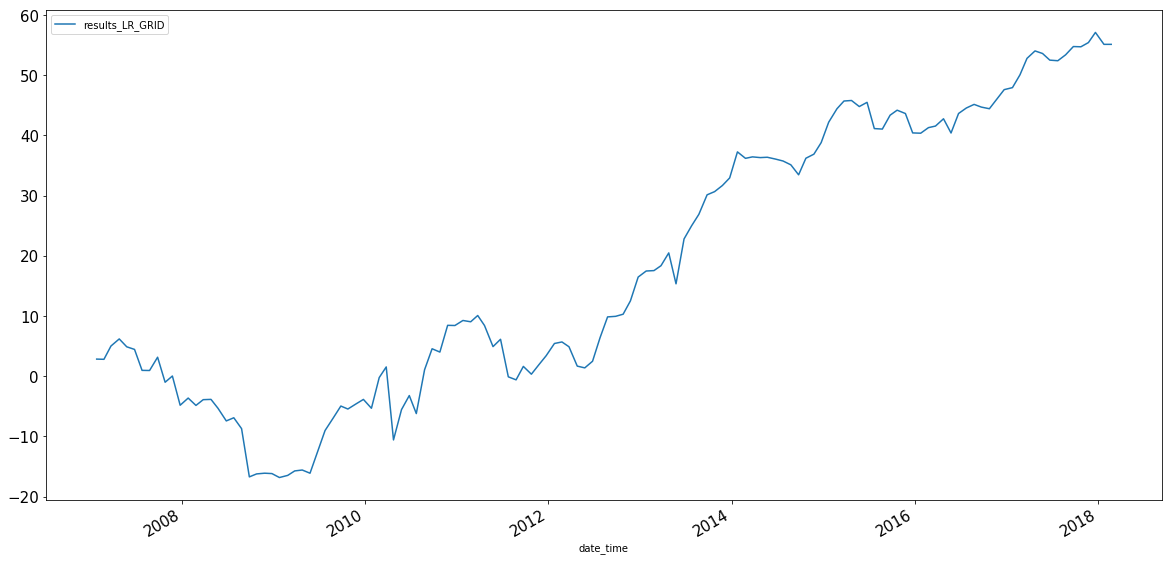

In [39]:
results_LR_GRID.cumsum().plot()

In [40]:
accuracy_score(y_test_std, predictions_LR_GRID)

0.5110182728316303

# Modelo vs eurostoxx

C:\Users\abmac\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\abmac\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


retabilidad anual del EuroStoxx 600 BRUTO: 1.4497961763322031
volatilidad anual del EuroStoxx 600 BRUTO: 14.804380446946993
ratio de información anual del EuroStoxx 600 BRUTO: 0.09793021609568164
retabilidad anual del EuroStoxx 600 NETO: 4.345304304218773
volatilidad anual del EuroStoxx 600 NETO: 14.875433733204277
ratio de información anual del EuroStoxx 600 NETO: 0.2921127801819573


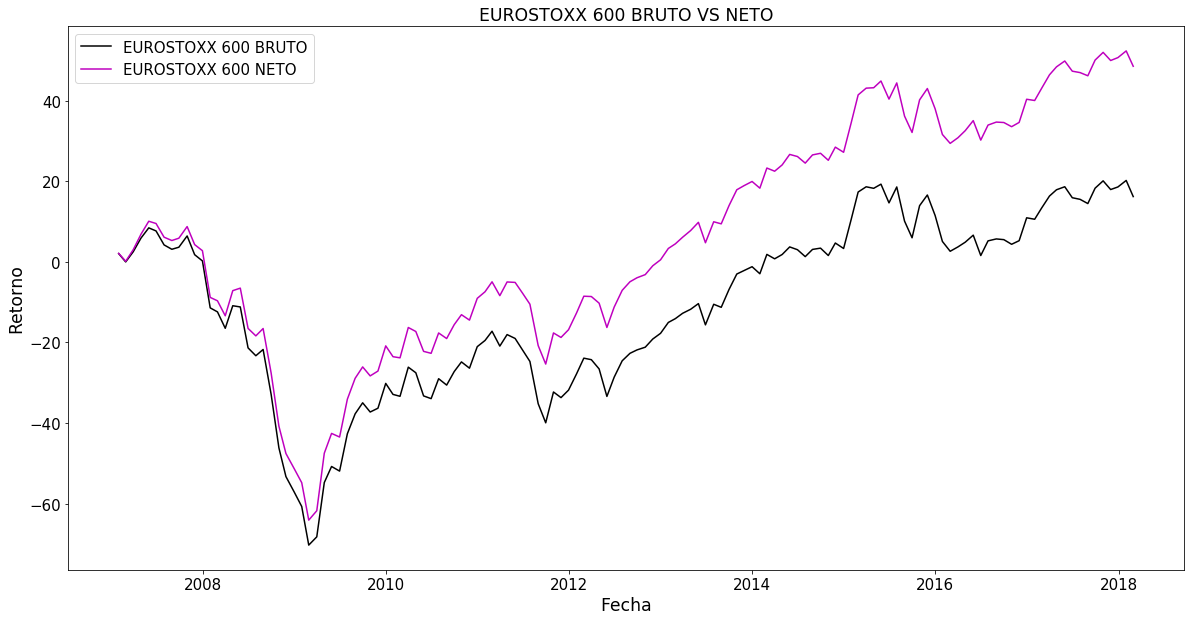

In [45]:
d = pd.read_csv('Desktop/hm_stoxx.csv', sep=';')
d = d.sort_index(ascending=False).dropna()
d =d.set_index('Date')
data_euros = d[['close','CLOSE']]

#EUROSTOXX BRUTO
data_euros['returns']= data_euros.close.pct_change()
fecha_corte = dt.datetime(2007,1,1)
# fecha_fin = dt.datetime(2018,2,23)
data_euros.index = pd.to_datetime(data_euros.index)
corte = data_euros[data_euros.index>=fecha_corte]
# cort_1 = corte[cort.index<=fecha_fin]
fecha_fin = dt.datetime(2018,3,23)
cort_1 = corte[corte.index<=fecha_fin]

retorno_indice = cort_1['returns'].mean()*12*100
volatilidad_indice = cort_1['returns'].std()*12**(1/2)*100
ratio_informacion = retorno_indice / volatilidad_indice
print('retabilidad anual del EuroStoxx 600 BRUTO: ' + str(retorno_indice))
print('volatilidad anual del EuroStoxx 600 BRUTO: ' + str(volatilidad_indice))
print('ratio de información anual del EuroStoxx 600 BRUTO: ' + str(ratio_informacion))


#EUROSTOXX NETO
data_euros['returns_N']= data_euros.CLOSE.pct_change()
fecha_corte = dt.datetime(2007,1,1)
# fecha_fin = dt.datetime(2018,2,23)
data_euros.index = pd.to_datetime(data_euros.index)
corte = data_euros[data_euros.index>=fecha_corte]
# cort_1 = corte[cort.index<=fecha_fin]
fecha_fin = dt.datetime(2018,3,23)
cort_1 = corte[corte.index<=fecha_fin]

retorno_indice = cort_1['returns_N'].mean()*12*100
volatilidad_indice = cort_1['returns_N'].std()*12**(1/2)*100
ratio_informacion = retorno_indice / volatilidad_indice
print('retabilidad anual del EuroStoxx 600 NETO: ' + str(retorno_indice))
print('volatilidad anual del EuroStoxx 600 NETO: ' + str(volatilidad_indice))
print('ratio de información anual del EuroStoxx 600 NETO: ' + str(ratio_informacion))

# GRAFICADO

indice_600_bruto = cort_1.returns*100
indice_cumsum = indice_600_bruto.cumsum()
plt.plot(indice_cumsum, color = 'k', label = 'EUROSTOXX 600 BRUTO')

indice_600_neto = cort_1.returns_N*100
indice_cumsum_N = indice_600_neto.cumsum()
plt.plot(indice_cumsum_N, color = 'm', label = 'EUROSTOXX 600 NETO')

plt.title('EUROSTOXX 600 BRUTO VS NETO',fontsize = 'xx-large')
plt.legend(prop={'size': 15})
plt.xlabel('Fecha',fontsize = 'xx-large')
plt.ylabel('Retorno',fontsize = 'xx-large')
rcParams['figure.figsize'] = 20, 10
label_size = 15
rcParams['xtick.labelsize'] = label_size
rcParams['ytick.labelsize'] = label_size

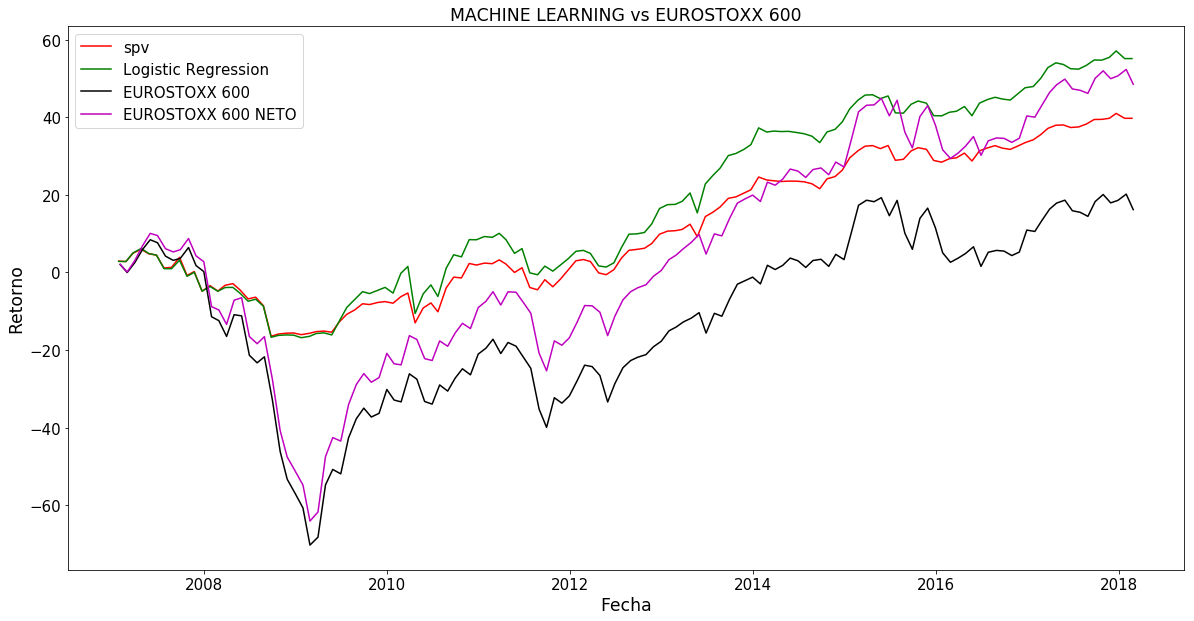

In [46]:
plt.title('MACHINE LEARNING vs EUROSTOXX 600',fontsize = 'xx-large')

# plt.plot(returns_s.cumsum(), color = 'r', label = 'spv grid search') #spv grid seach

#plt.plot(returns_svm_std.cumsum(), color='r',label ='spv linear')
plt.plot(returns_svm_GS.cumsum(), color='r',label ='spv')
plt.plot(results_LR_GRID.cumsum(), color = 'g',label = 'Logistic Regression')

#indice
indice_600 = cort_1.returns*100
indice_cumsum = indice_600.cumsum()
plt.plot(indice_cumsum, color = 'k', label = 'EUROSTOXX 600')


indice_600_neto = cort_1.returns_N*100
indice_cumsum_N = indice_600_neto.cumsum()
plt.plot(indice_cumsum_N, color = 'm', label = 'EUROSTOXX 600 NETO')



plt.legend(prop={'size': 15})
plt.xlabel('Fecha',fontsize = 'xx-large')
plt.ylabel('Retorno',fontsize = 'xx-large')
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
label_size = 15
rcParams['xtick.labelsize'] = label_size
rcParams['ytick.labelsize'] = label_size

In [47]:
n_total = len(data)
feature_to_eliminate = ['close']
data_sel = data.drop(feature_to_eliminate,axis=1).dropna()
data_sel.index = pd.to_datetime(data_sel.index )
fecha_corte = dt.datetime(2007,1,1)
k = data_sel[data_sel.index > fecha_corte]
data_buena= k.to_csv('Desktop/definitivo/buena_2007.csv')